In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from math import sqrt
import matplotlib.pyplot as plt
import scipy.stats
from random import shuffle

### Hypothesis test for the sample proportion

In this notebook we demonstrate how to carry out a hypothesis test for the sample proportion. If the conditions to ensure that the sampling distribution of the proportion is almost normal hold we can apply the same techniques we already applied in [this notebook](./02_Hypothesis_testing_based_on_the_normal_model.ipynb) for the population mean. There are, however, some changes in the way the standard error is calculated. 

The sample proportion can be represented as the average of the set of successes (1) and failures (0) in a sample of independent trials which probality is the population proportion. 

#### The sampling distribution of the sample proportion

If observations are independent and the success-failure condition is met (both n\*p>10 and n\*(1-p)>10, where n is the sample size and p is the sample proportion) the sampling distribution of the sample proportion is normally distributed around the value of the population proportion. The standard distribution of the sample proportion, or standard error, is calculated as:

SE = sqrt(p\*(1-p)/n)

In this example we are assuming that the population proportion is p=0.7. We simulate the sampling of 10000 samples of size 10000 from that population and plot the sampling distribution. 

Standard error from population mean value = 0.0045825756949558405


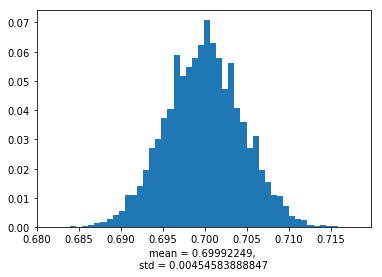

In [2]:
P = 0.7
NUMBER_SAMPLES = 10000
SIZE_SAMPLE = 10000

p_sample = []
for i in range(NUMBER_SAMPLES):
    p_sample.append(np.mean(np.random.binomial(size=SIZE_SAMPLE, n=1, p=P)))

fig, ax = plt.subplots()
mean = np.mean(p_sample)
std = np.std(p_sample)
weights = np.ones_like(p_sample)/float(len(p_sample))
ax.hist(p_sample, bins=50, weights=weights)
ax.set_xlabel('mean = ' + str(mean) + ', \nstd = ' + str(std))

se = sqrt(0.7*(1-0.7)/SIZE_SAMPLE)
print('Standard error from population mean value = ' + str(se))

#### Hypothesis test

*A new law is to be proposed, and the government wants to determine whether the majority of the population would be for the implementation of that law. In order to do that, they took a random sample of 100 individuals among the population and asked them whether they would be for the new law. They obteined a 53% support. Does the government have enough evidence to approve the new law?*

This is a hypothesis test for the population proportion. The null and alternate hypothesis are:

```
H0: p0 = 0.5
HA: p0 > 0.5
```

Let's first determine whether the sampling distribution is nearly normal. The observations are independent and the size of the sample is smaller than 10% of the population. With respect of the success-failure condition, that has to be based on p0 for the case of a hypothesis test:

In [3]:
p0 = 0.5
n = 100

print('p0 * n = ' + str(p0*n))
print('(1-p0) * n = ' + str((1-p0)*n))

p0 * n = 50.0
(1-p0) * n = 50.0


Both values are higher than 0, so we can conclude that the sampling distribution is nearly normal. The standard error can be calculated now, using p0 since this is a hypothesis test:

In [4]:
SE = sqrt(p0*(1-p0)/n)
print('SE = ' + str(SE))

SE = 0.05


The sample proportion is ps=0.53. In order to obtain a p-value we first calculate the Z-score:

In [5]:
ps = 0.53
Z = (ps-p0)/SE
print('Z = ' + str(Z))

Z = 0.6000000000000005


Since this is a one-side test, we use the upper tail of the normal distribution to obtain the p-value:

In [6]:
p_value = 1 - scipy.stats.norm.cdf(Z)
print('p-value = ' + str(p_value))

p-value = 0.27425311775


The p-value is higher than the significance level of 0.05, so we cannot reject the null hypothesis. We do not have enough evidence to support the affirmation that the majority of the population supports the new law.

#### Choose the sample size

What large should be the sample size to make sure that we have enough evidence of a significant majority if that majority actually exists? 

We can use the margin of error of the confidence interval to determine the size of the sample. Given the sample in the previous sample, the confidence interval is given by:

In [7]:
lower = ps - 1.96*SE # 1.96 corresponds to the confidence level for a 95% confidence interval
higher = ps + 1.96*SE

print([lower, higher])

[0.43200000000000005, 0.628]


The null hypothesis value (0.5) is within that confidence interval. That's the reson why we couldn't reject the null hypothesis. We need a sample size that ensures that the margin of error (the 1.96\*SE part of the confience interval) leaves 0.5 out of the confidence interval:

In [8]:
m = ps - p0
print('target margin of error = ' + str(m))

target margin of error = 0.030000000000000027


Let's use a target margin of error of 0.031:

```
m = 1.96\*sqrt(p0\*(1-p0)/n)
n = p0\*(1-p0)/(m/1.96)\*\*2
```

In that expression we can use p0, or we can use p0=0.5 to take into account the worst case scenario. In our example p0 is already 0.5.

In [9]:
n = p0*(1-p0)/(m/1.96)**2
print('sample size = ' + str(n))

sample size = 1067.1111111111093


And let's repeat the hypothesis test, assuming that the sample proportion is still 0.53

In [10]:
SE = sqrt(p0*(1-p0)/n)
print('SE = ' + str(SE))

Z = (ps-p0)/SE
print('Z = ' + str(Z))

p_value = 1 - scipy.stats.norm.cdf(Z)
print('p-value = ' + str(p_value))

SE = 0.015306122448979605
Z = 1.96
p-value = 0.0249978951482


In this case the p-value is lower than 0.05, so we can reject the null hypothesis.

#### Simulation for hypothesis testing of the proportion

If the sample is small and the success-failure condition is not hold we can apply a simulation method to perform a hypothesis test of the sample proportion. 

Let's assume a setting in which a 20% of the population with a given chronic disease will not survive longer than one year. A group of researchers investigated a new treatment and they claim that they can reduce this probability. The test can be specified as:

```
H0: p0 = 0.2
HA: pA < 0.2
```

The group of researchers based their claims about the efficiency of their treatment in the fact that they tested the treatment with 40 patients and only 5 of them did not survive after one year passed. 

In this setting is easy to check that the success-failure condition does not hold:

In [11]:
N = 40
P0 = 0.2

print(N*P0)
print(N*(1-P0))

8.0
32.0


In [12]:
SUCCESSES = 5
p_sample = SUCCESSES/N
print(p_sample)

0.125


Given a sample of size n and p0, we can simulate a p_sim by producing n random trials with probability p0:

In [13]:
def calculate_p_sim(n, p0):
    return np.sum(np.random.uniform(size=n) <= p0)/float(n)

print(calculate_p_sim(N, P0))

0.3


We can now obtain a distribution for p_sim to approximate the null distribution by obtaining multiple samples using this method. The p-value is calculated as the number of p_sim values that support the alternate hypothesis (that are equal or lower than p_sample) divided by the total number of p_sim values. 

p-value = 0.0758


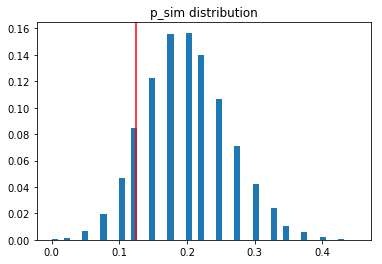

In [14]:
SIZE_SAMPLE = 10000

p_sim_sample = [calculate_p_sim(N, P0) for i in range(SIZE_SAMPLE)]

fig, ax = plt.subplots()
weights = np.ones_like(p_sim_sample)/float(len(p_sim_sample))
ax.hist(p_sim_sample, bins=50, weights=weights)
ax.set_title('p_sim distribution')

p_value = np.sum(np.array(p_sim_sample) < p_sample)/len(p_sim_sample)
print('p-value = ' + str(p_value))

plt.axvline(x=p_sample, color='red')

The p_value is not lower than a significance level of 0.05, so we fail to reject the null hypothesis. 

When using this method we have to take into account that large p-values may be overestimated. Additionally, if the sample proportion if very close to the population mean we may obtain p-values that are larger than 1. In that case we have to consider these values equal to 1.  

#### Using the binomial distribution in simulations

Another option to apply simulation for the hypothesis test of the sample distribution when the success-condition failure does not hold is to simulate the null hypothesis and compute the p-value by means of a binomial distribution. In our case, the distribution of interest has parameters n=40 and p=p0=0.2:

In [15]:
# I am using the following code to compute n choose k. The code 
# is copied from https://stackoverflow.com/questions/3025162/statistics-combinations-in-python.

def choose(n, k):
    if 0 <= k <= n:
        ntok = 1
        ktok = 1
        for t in range(1, min(k, n - k) + 1):
            ntok *= n
            ktok *= t
            n -= 1
        return ntok // ktok
    else:
        return 0

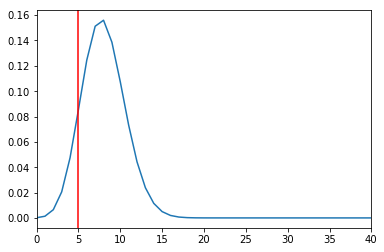

In [16]:
fig, ax = plt.subplots()
x = np.arange(0, N+1)
y = [choose(int(N), int(k))*P0**k*(1-P0)**(N-k) for k in x]
ax.plot(x, y)
ax.set_xlim([0,N])

plt.axvline(x=5, color='red')

The p-value is calculated as the sum of the binomial distribution for all the k values that support the alternate hypothesis. It must be noted that a) the p-value may be overestimated in those cases in which the p-value is high, and b) the p-value can be greater than 1 if the sample proportion is very close to the p0 value (we assign a p-value=1 in that case)

In [17]:
p_value = np.sum(np.array(y)[0:5])
print('p-value = ' + str(p_value))

p-value = 0.0759144954499


### Hypothesis test for the difference of proportions

In this section, we will demonstrate how to carry out a hypothesis test based on the difference of proportions. The process is similar to the one followed above, with some slight differences.

Let's start by setting up the problem. Let's assume that we made an experiment in which we distributed 500 pacients into two groups of 250 pacients each, a treatment group and a control group. The treatment group is given a new type of medicine that will prevent a certain condition to become chronic, whereas the treatment group was instead given a sugar pill that looked exactly like the medicine. The condition became chronic for a 20% of the pacients in the treatment group and for 25% of the pacients in the control group. Does this data support the idea that the medicine has an impact on preventing the condition of a pacient to become chronic?

The results of this experiment can be tested by means of a hypothesis test for the difference of proportions, where the null and alternate hypothesis are:

```
H0: p_treatment - p_control = 0
HA: p_treatment - p_control > 0
```

Since the null hypothesis states that the two proportions are the same we will use the pooled proportion both to test the success-failure condition and to calculate the standard error. 

In [18]:
P1 = 0.2
N1 = 250
P2 = 0.25
N2 = 250

p_pooled = (P1*N1 + P2*N2)/(N1 + N2)
print('Pooled proportion = ' + str(p_pooled))

Pooled proportion = 0.225


We assume that the sample is independent. The other condition that hast to hold *for both samples* to be able to apply the hypothesis test is the success-failure condition:

In [19]:
print('First sample:')
print('   n*p = ' + str(N1*p_pooled))
print('   n*(1-p) = ' + str(N1*(1-p_pooled)))
print('Second sample:')
print('   n*p = ' + str(N2*p_pooled))
print('   n*(1-p) = ' + str(N2*(1-p_pooled)))

First sample:
   n*p = 56.25
   n*(1-p) = 193.75
Second sample:
   n*p = 56.25
   n*(1-p) = 193.75


We can now carry out the hypothesis test as we did in the case of the hypothesis test for the sample proportion (see above). The only difference is the way in which we compute the standard error:

```
SE = sqrt(SE_p1**2 + SE_p2**2)
```

And, once again, since the null hypothesis considers the sample proportions to be equal, we use p_pooled instead of p1 and p2.

In [20]:
SE_p1 = p_pooled*(1-p_pooled)/N1
SE_p2 = p_pooled*(1-p_pooled)/N2
SE = sqrt(SE_p1 + SE_p2)
print('SE = ' + str(SE))

ps = 0.25 - 0.2
p0 = 0
Z = (ps-p0)/SE
print('Z = ' + str(Z))

p_value = 1 - scipy.stats.norm.cdf(Z)
print('p-value = ' + str(p_value))

SE = 0.0373496987939662
Z = 1.3386988815041645
p-value = 0.0903343602788


In this example the p-value is higher than the 0.05 significance level, so we fail to reject the null hypothesis. 

#### Simulation for hypothesis testing of the difference of proportions

If the sample is small and therefore the success-failure condition does not hold we can still try to extract conclusions from our experiment by applying simulation. In th case of the difference of proportions, simulation test is based on what is known as permutation test. Given two samples of size n1 and n2, one simulated (p1-p2)\_sim value can be calculated by randomly assigning n1 observations to the treatment group and n2 observations to the control group, and then calculating the difference of proportions. If we repeat this process multiple times we can approximate the null distribution, and use this distribution to calculate a p-value by counting the number of simulations that support the alternate hypothesis and dividing by the total number of simulations. 

Let's assume the same problem as before (experiment to test a medicine to decrease the likelihood of a condition to become chronic), but in this case lets assume that the size of the samples are n1=21 and n2=23. 

|       | Treatment | Control   |
|-------|----------:|----------:|
|Success| 6         |  4        |
|Failure| 15        |  19       |
|Total  | 21        |  23       |


The success-failure condition does not hold:

In [21]:
N1 = 21
P1 = 6/N1
N2 = 23
P2 = 4/N2

print('p1 = ' + str(P1))
print('p2 = ' + str(P2))

p1p2_sample = P1 - P2
print('p1 - p2 = ' + str(p1p2_sample))

p_pooled = (P1*N1 + P2*N2)/(N1 + N2)
print('Pooled proportion = ' + str(p_pooled))

print('First sample:')
print('   n*p = ' + str(N1*p_pooled))
print('   n*(1-p) = ' + str(N1*(1-p_pooled)))
print('Second sample:')
print('   n*p = ' + str(N2*p_pooled))
print('   n*(1-p) = ' + str(N2*(1-p_pooled)))

p1 = 0.2857142857142857
p2 = 0.17391304347826086
p1 - p2 = 0.11180124223602483
Pooled proportion = 0.22727272727272727
First sample:
   n*p = 4.7727272727272725
   n*(1-p) = 16.227272727272727
Second sample:
   n*p = 5.2272727272727275
   n*(1-p) = 17.772727272727273


In [22]:
# This function calculates a simulated value of p1-p2 by applying
# random permutation to the sample.
# Random permutation is implemented by randomly shuffling the sample
def calculate_p1_p2_sim(n1, n2, sample):
    shuffle(sample)
    s1 = sample[0:n1]
    s2 = sample[n1:]
    p1 = np.sum(s1)/len(s1)
    p2 = np.sum(s2)/len(s2)
    
    return(p1-p2)

In [23]:
# The sample contains the N1 + N2 observations
sample = ([True]*6)
sample.extend([False]*15)
sample.extend([True]*4)
sample.extend([False]*19)
print(sample)

[True, True, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False]


In [24]:
# Simulating one value of p1-p2 based on random permutation
p1p2_sim = calculate_p1_p2_sim(N1, N2, sample)
print(p1p2_sim)

-0.0703933747412


p-value = 0.1114


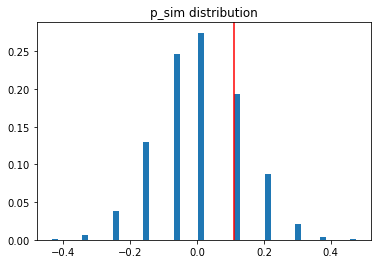

In [25]:
# Simulating the null distribution by obtaining multiple simulations of p1-p2
SIZE_SAMPLE = 10000

p1p2_sim_sample = [calculate_p1_p2_sim(N1, N2, sample) for i in range(SIZE_SAMPLE)]

fig, ax = plt.subplots()
weights = np.ones_like(p1p2_sim_sample)/float(len(p1p2_sim_sample))
ax.hist(p1p2_sim_sample, bins=50, weights=weights)
ax.set_title('p_sim distribution')

p_value = np.sum(np.array(p1p2_sim_sample) > p1p2_sample)/len(p1p2_sim_sample)
print('p-value = ' + str(p_value))

plt.axvline(x=p1p2_sample, color='red')

The p-value is higher than the significance level of 0.05, so we fail to reject the null hypothesis.